<a href="https://colab.research.google.com/github/denielhs/dio_Santander/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-code machine-learning libraries in Python applied to diagnose Parkinson's disease using speech signal.

## Preparing the data [Extraction]

In [2]:
########## Libraries for data preparation ##########
## Pandas library
import pandas as pd
# !pip install openpyxl

In [30]:
########## Importing the dataset ##########
# The dataset is available at the address: https://archive.ics.uci.edu/dataset/174/parkinsons

df = pd.read_excel('dataset_parkinson.xlsx')

# Analysing the dataset - the first 3 records
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,11999200,15730200,7499700,784,7,370,554,1109,4374,...,6545,2211,2103300,1,414783,815285,-4813031,266482,2301442,284654
1,phon_R01_S01_2,12240000,14865000,11381900,968,8,465,696,1394,6134,...,9403,1929,1908500,1,458359,819521,-4075192,335590,2486855,368674
2,phon_R01_S01_3,11668200,13111100,11155500,1050,9,544,781,1633,5233,...,8270,1309,2065100,1,429895,825288,-4443179,311173,2342259,332634


In [4]:
# Analysing the dataset - the last 3 records
df.tail(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
192,phon_R01_S50_4,17468800,24000500,7428700,1360,8,624,564,1873,2308,...,3804,10715,1788300,0,407567,655683,-6787197,158453,2679772,131728
193,phon_R01_S50_5,19876400,39696100,7490400,740,4,370,390,1109,2296,...,3794,7223,1902000,0,451221,643956,-6744577,207454,2138608,123306
194,phon_R01_S50_6,21428900,26027700,7797300,567,3,295,317,885,1884,...,3078,4398,2120900,0,462803,664357,-5724056,190667,2555477,148569


In [5]:
########## Removing the column name ##########
df_final = df.drop("name", axis = 1)
df_final.head(3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,11999200,15730200,7499700,784,7,370,554,1109,4374,42600,...,6545,2211,2103300,1,414783,815285,-4813031,266482,2301442,284654
1,12240000,14865000,11381900,968,8,465,696,1394,6134,62600,...,9403,1929,1908500,1,458359,819521,-4075192,335590,2486855,368674
2,11668200,13111100,11155500,1050,9,544,781,1633,5233,48200,...,8270,1309,2065100,1,429895,825288,-4443179,311173,2342259,332634


In [8]:
# Resume of the dataset
df_final.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1.950000e+02,1.950000e+02,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,1.950000e+02,195.000000,1.950000e+02,195.000000
mean,1.542286e+07,1.971049e+07,1.163246e+07,622.046154,4.728205,330.641026,344.635897,991.994872,2970.912821,28225.128205,...,4699.261538,2484.707692,2.188597e+06,0.753846,498535.538462,718099.046154,-5.684397e+06,226510.348718,2.381826e+06,206551.641026
std,4.139006e+06,9.149155e+06,4.352141e+06,484.813369,3.523555,296.777442,275.897665,890.334436,1885.693186,19487.729006,...,3045.911943,4041.844856,4.425764e+05,0.431878,103941.714131,55335.830347,1.090208e+06,83405.762620,3.827990e+05,90119.322482
min,8.833300e+06,1.021450e+07,6.547600e+06,168.000000,1.000000,68.000000,92.000000,204.000000,954.000000,8500.000000,...,1364.000000,65.000000,8.441000e+05,0.000000,256570.000000,574282.000000,-7.964984e+06,6274.000000,1.423287e+06,44539.000000
25%,1.175720e+07,1.348625e+07,8.429100e+06,346.000000,3.000000,166.000000,186.000000,498.500000,1650.500000,14850.000000,...,2473.500000,592.500000,1.919800e+06,1.000000,421306.000000,674757.500000,-6.450096e+06,174350.500000,2.099126e+06,137451.000000
50%,1.487900e+07,1.758290e+07,1.043150e+07,494.000000,4.000000,250.000000,269.000000,749.000000,2297.000000,22100.000000,...,3836.000000,1166.000000,2.208500e+06,1.000000,495954.000000,722254.000000,-5.720868e+06,218885.000000,2.361532e+06,194052.000000
75%,1.827690e+07,2.242055e+07,1.400185e+07,736.500000,6.000000,383.500000,395.500000,1150.500000,3788.500000,35000.000000,...,6079.500000,2564.000000,2.507550e+06,1.000000,587562.500000,761881.500000,-5.046192e+06,279234.000000,2.636456e+06,252980.000000
max,2.601050e+07,5.920300e+07,2.391700e+07,3316.000000,26.000000,2144.000000,1958.000000,6433.000000,11908.000000,130200.000000,...,16942.000000,31482.000000,3.304700e+06,1.000000,685151.000000,825288.000000,-2.434031e+06,450493.000000,3.671155e+06,527367.000000


## Pycaret - Model's Analysis


In [27]:
########## Importing the libraries for PyCaret analysis ##########
#!pip install autoviz
#!pip install pycaret[full]
import pycaret
from pycaret.classification import *

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

### Setup Function [Transformation]

In [28]:
setup_clas = setup(data=df_final, target = 'status',
                   train_size = 0.70, session_id = 1245,
                   normalize = True, normalize_method = 'zscore',
                   fold_strategy = 'kfold', fold = 10,
                   fix_imbalance = True,
                   remove_multicollinearity = True,
                   multicollinearity_threshold = 0.96
                   )

,Description,Value
0,Session id,1245
1,Target,status
2,Target type,Binary
3,Original data shape,"(195, 23)"
4,Transformed data shape,"(265, 15)"
5,Transformed train set shape,"(206, 15)"
6,Transformed test set shape,"(59, 15)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


### Compare Models

In [29]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9181,0.9767,0.9306,0.9626,0.9433,0.7714,0.7932,0.5050
knn,K Neighbors Classifier,0.8819,0.9630,0.8515,0.9900,0.9107,0.7187,0.7495,0.1890
rf,Random Forest Classifier,0.8808,0.9750,0.9015,0.9455,0.9159,0.6470,0.6697,0.2300
ada,Ada Boost Classifier,0.8753,0.9511,0.9217,0.9206,0.9162,0.6472,0.6805,0.2180
xgboost,Extreme Gradient Boosting,0.8742,0.9167,0.9117,0.9305,0.9127,0.6253,0.6528,0.1920
gbc,Gradient Boosting Classifier,0.8665,0.9548,0.9135,0.9220,0.9110,0.6008,0.6304,0.3620
lightgbm,Light Gradient Boosting Machine,0.8665,0.9429,0.9026,0.9311,0.9100,0.6061,0.6349,0.3800
dt,Decision Tree Classifier,0.8374,0.7980,0.8842,0.9147,0.8908,0.5206,0.5610,0.0930
qda,Quadratic Discriminant Analysis,0.8258,0.8685,0.8998,0.8761,0.8840,0.5288,0.5433,0.0570
lr,Logistic Regression,0.8022,0.9179,0.8224,0.9179,0.8580,0.4733,0.5051,0.1760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1245, verbose=0, warm_start=False)

### Creating and tunning the Models

I'm using this manual function (create_model) because I would like to tune the models.

In [34]:
########## Creating the models ##########
et_model = create_model('et', verbose=False)
knn_model = create_model('knn', verbose=False)
ada_model = create_model('ada', verbose=False)
lig_model = create_model('lightgbm', verbose=False)
rf_model = create_model('rf', verbose=False)
xgb_model = create_model('xgboost', verbose=False)
gbc_model = create_model('gbc', verbose=False)
qda_model = create_model('qda', verbose=False)
svm_model = create_model('svm', verbose=False)
dt_model = create_model('dt', verbose=False)
lda_model = create_model('lda', verbose=False)
lr_model = create_model('lr', verbose=False)
rid_model = create_model('ridge', verbose=False)
nb_model = create_model('nb', verbose=False)
rbf_model = create_model('rbfsvm', verbose=False)
dum_model = create_model('dummy', verbose=False)
mlp_model = create_model('mlp',verbose=False)

In [35]:
### Tunning the Models
# METRIC = Accuracy
tuned_et = tune_model(et_model, optimize='F1', verbose=False)
tuned_knn = tune_model(knn_model, optimize='F1', verbose=False)
tuned_ada = tune_model(ada_model, optimize='F1', verbose=False)
tuned_lig = tune_model(lig_model, optimize='F1', verbose=False)
tuned_rf = tune_model(rf_model, optimize='F1', verbose=False)
tuned_xgb = tune_model(xgb_model, optimize='F1', verbose=False)
tuned_gbc = tune_model(gbc_model, optimize='F1', verbose=False)
tuned_qda = tune_model(qda_model, optimize='F1', verbose=False)
tuned_svm = tune_model(svm_model, optimize='F1', verbose=False)
tuned_dt = tune_model(dt_model, optimize='F1', verbose=False)
tuned_lda = tune_model(lda_model, optimize='F1', verbose=False)
tuned_lr = tune_model(lr_model, optimize='F1', verbose=False)
tuned_rid = tune_model(rid_model, optimize='F1', verbose=False)
tuned_nb = tune_model(nb_model, optimize='F1', verbose=False)
tuned_rbf = tune_model(rbf_model, optimize='F1', verbose = False)
tuned_dum = tune_model(dum_model, optimize='F1', verbose=False)
tuned_mlp = tune_model(mlp_model, optimize='F1', verbose=False)

### Evaluating the models (FI, Confusion Matrix and ROC) - [LOADING]

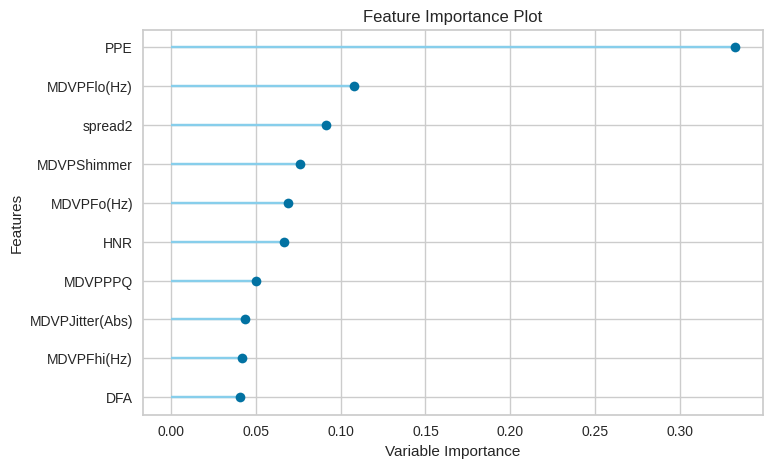

In [36]:
plot_model(tuned_gbc, plot = 'feature')

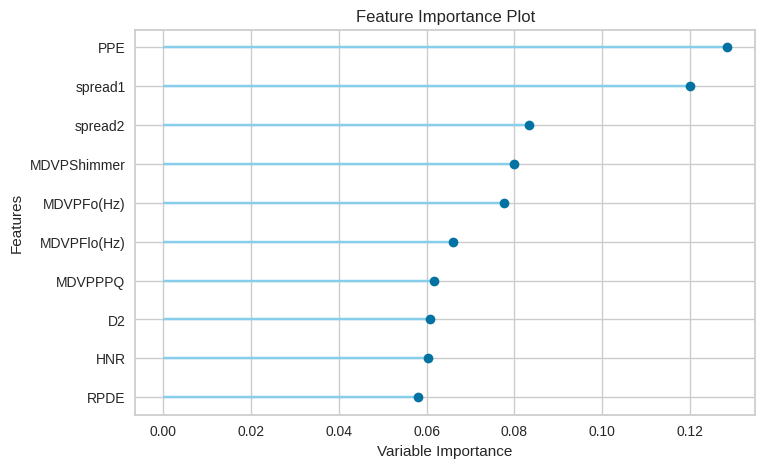

In [37]:
plot_model(tuned_et, plot='feature', )

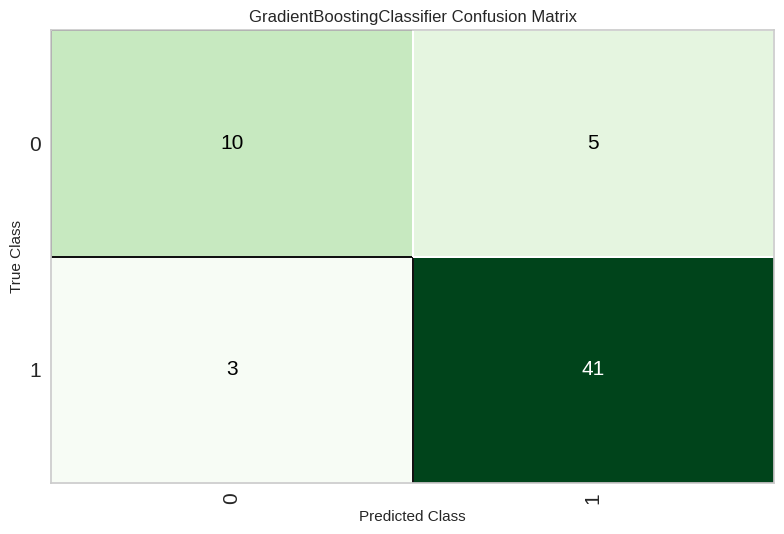

In [38]:
plot_model(tuned_gbc, plot = 'confusion_matrix' )

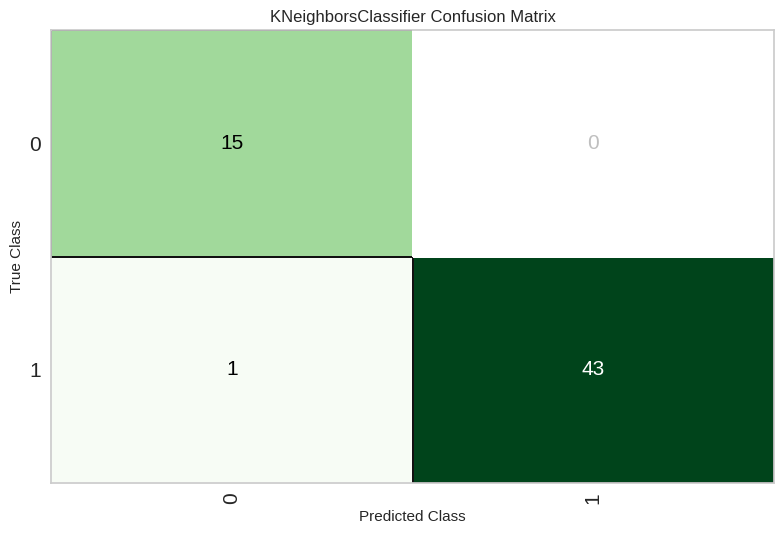

In [39]:
plot_model(tuned_knn, plot='confusion_matrix')

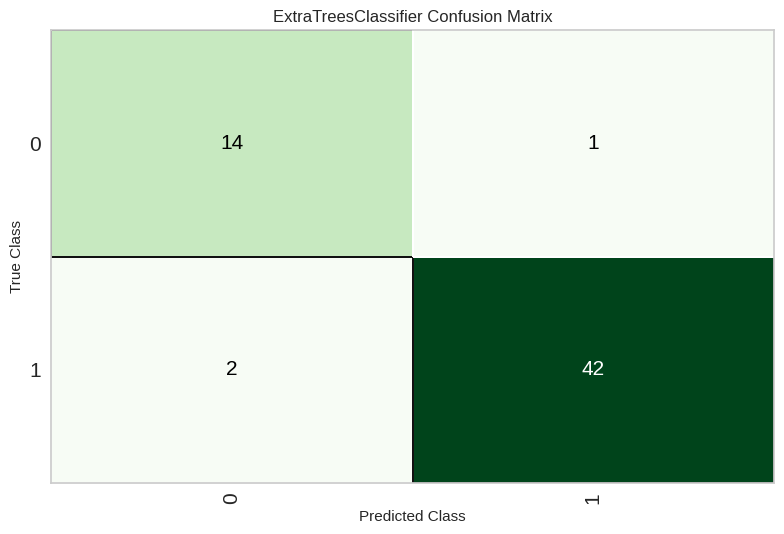

In [40]:
plot_model(tuned_et, plot='confusion_matrix')

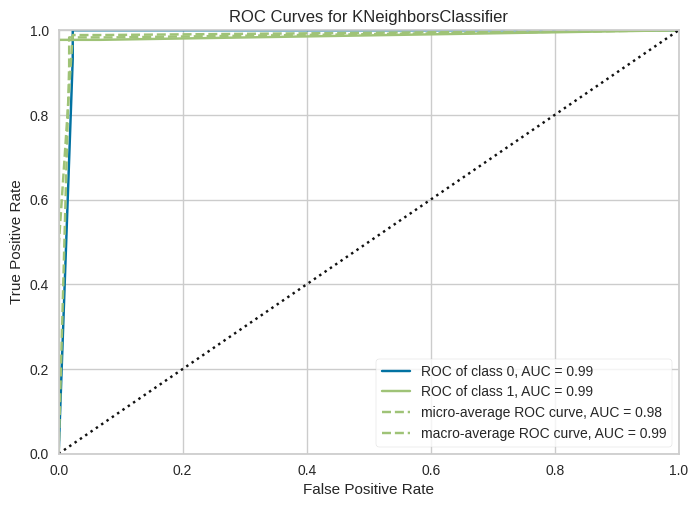

In [41]:
plot_model(tuned_knn, plot='auc')

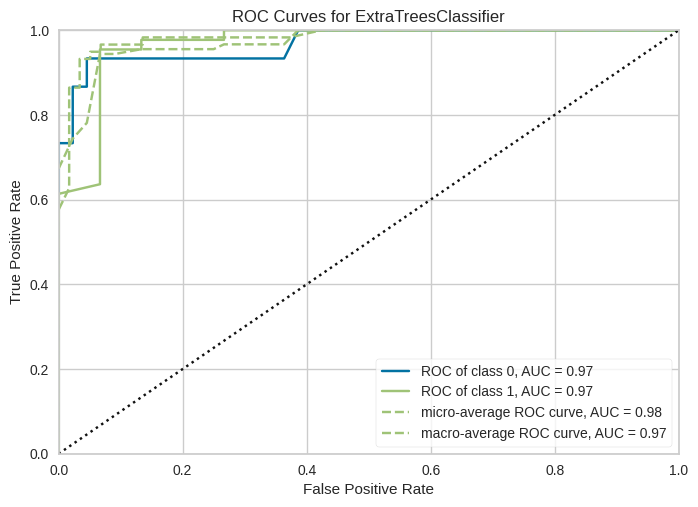

In [42]:
plot_model(tuned_et, plot='auc')

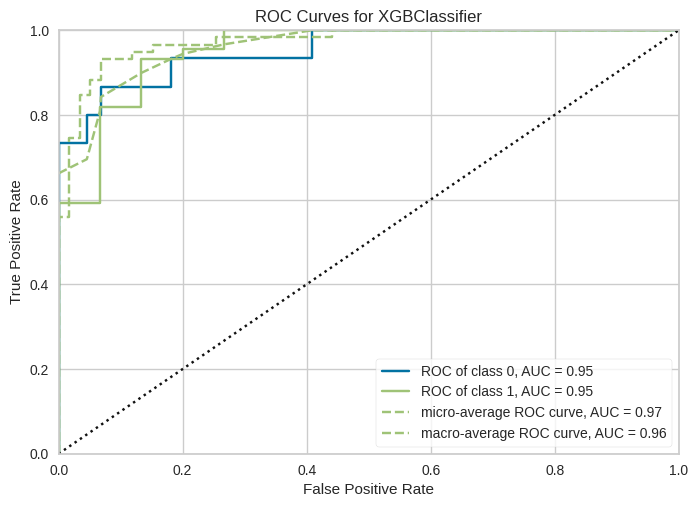

In [43]:
plot_model(xgb_model, plot = 'auc')

### Predicting the models

In [51]:
########## Predicting the Models ##########
## Predict the Top 5 models.
predict_model(tuned_et)
predict_model(tuned_gbc)
predict_model(tuned_knn)
predict_model(tuned_rf)
predict_model(tuned_mlp)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9492,0.9689,0.9545,0.9767,0.9655,0.8688,0.8696


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8644,0.9409,0.9318,0.8913,0.9111,0.6260,0.6287


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9831,0.9879,0.9773,1.0000,0.9885,0.9563,0.9572


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9322,0.9500,0.9773,0.9348,0.9556,0.8130,0.8166


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.7458,0.8727,0.8182,0.8372,0.8276,0.3440,0.3443


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,prediction_label,prediction_score
182,14981800,16341700,14478600,336,2,174,198,521,2145,19800,...,2300800,329577,757180,-6277170,109397,2209021,156368,1,1,0.6742
5,12055200,13116200,11378700,968,8,463,750,1388,4701,45600,...,2137800,415564,825069,-4242867,299111,2187560,357775,1,1,0.9978
23,17391700,19273500,8618000,476,3,221,258,663,4192,36400,...,2042200,537264,686894,-5248776,210279,2547508,253556,1,1,0.9828
185,11628600,17729100,9698300,314,3,134,192,403,1564,13600,...,2419900,598515,654331,-5592584,133917,2058658,214346,0,1,0.5392
137,11316600,13027000,10067300,502,4,257,312,772,5279,47600,...,1674700,625362,708617,-4654894,304107,2672362,274387,1,1,0.9966
89,17971100,22593000,14487800,709,4,391,419,1172,4313,44200,...,1186600,590951,745526,-4379411,375531,3671155,332086,1,1,0.9991
106,15507800,16373600,14414800,168,1,68,92,204,1064,9700,...,2974600,334171,677930,-6981201,184550,2129924,106802,1,0,0.7342
192,17468800,24000500,7428700,1360,8,624,564,1873,2308,25600,...,1788300,407567,655683,-6787197,158453,2679772,131728,0,1,0.5256
38,18019800,20124900,17545600,284,2,153,166,459,1444,13100,...,2673800,403884,766209,-6452058,212294,2269398,141929,1,0,0.5807
159,12793000,13875200,11217300,605,5,321,318,962,3235,33900,...,1965100,654945,675865,-5498456,234196,2103014,216638,1,1,0.7235
